# Prepare functions

In [1]:
import scanpy as sc


In [2]:
sc.pl.palettes.vega_10_scanpy

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#b5bd61',
 '#17becf']

# Setup

In [3]:
import sys
sys.path.insert(1, '/users/genomics/xoel/canonades/bioinforgalician/src/python/celloracle')

In [4]:
import os

subset = 'Gliogenesis'
os.chdir(f'/users/genomics/xoel/codebases/co_new/data/{subset}/')

In [5]:
new_dir = f'/users/genomics/xoel/codebases/co_new/data_foxg1/{subset}/'
os.makedirs(new_dir, exist_ok=True)

In [6]:
import scanpy as sc
sc.set_figure_params(
    scanpy=True,
    dpi=80, 
    dpi_save=300, 
    frameon=True,
    vector_friendly=True, 
    fontsize=14, 
    figsize=None, 
    color_map=None,
    facecolor=None, 
    transparent=False, 
    ipython_format='png2x')
sc.settings.verbosity=4
sc.settings.autosave=True
sc.settings.autoshow=True

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300

In [7]:
n_cores = min(int(os.getenv('SLURM_CPUS_PER_TASK')) -4 or 18, 96)
n_cores

92

In [8]:
groups = {
    'vRG': ['vRG E', 'vRG L'],
    'vtRG': ['vRG E', 'vRG L', 'tRG'],
    'oRG': ['oRG E', 'oRG L'],
    'RG E': ['vRG E', 'vRG E'],
    'RG L': ['vRG E', 'vRG L'],
    'RGC': ['vRG E','vRG L','tRG','oRG E','oRG L'],
    'Glial': ['mGPC', 'Astro', 'OPC'],
    'Diff Glia': ['Astro', 'OPC']
}

### Genes to keep: DE TFs ASD/Ctrl

In [9]:
import pandas as pd

In [10]:
# with open('/users/genomics/xoel/codebases/ASD_IPSC_sept/data/bulk_de_tfs.txt', 'rt') as f:
with open('/users/genomics/xoel/codebases/co_new/src/FOXG1_subanalysis/tfs.txt', 'rt') as f:
    genes_to_keep = [x.strip() for x in f.readlines()]
genes_to_keep

# Previous run
# ASD_DEA = pd.read_excel('/users/genomics/xoel/codebases/ASD_IPSC_june/DE_DS/ASD_vs_Ctrl_markers.Annotated.xlsx',
#                         sheet_name='TFs_Filtered_with_padj')
# genes_to_keep = ASD_DEA['gene'].unique().tolist()
# genes_to_keep

# genes_to_keep =
# ['ATOH8',
#  'CEBPZ',
#  'DBX1',
#  'FOXD1',
#  'FOXG1',
#  'MECOM',
#  'MYC',
#  'SALL4',
#  'SON',
#  'SP8',
#  'YBX3',
#  'ZNF24',
#  'ZNF302',
#  'ZNF572',
#  'ZNF703',
#  'ZNF718',
#  'ZNF775']

['DMRTA1',
 'EGR1',
 'EMX2',
 'FEZF1',
 'FEZF2',
 'FOXB1',
 'FOXG1',
 'HES1',
 'HES4',
 'HES5',
 'IRX3',
 'JUND',
 'LHX2',
 'MEIS2',
 'NR2F1',
 'NR2F2',
 'NR6A1',
 'PAX6',
 'PEG3',
 'PHOX2B',
 'PITX2',
 'POU3F1',
 'POU3F2',
 'RAX',
 'RFX4',
 'SALL4',
 'SIX3',
 'SOX2',
 'SOX4',
 'TAL2',
 'VAX2',
 'YBX3',
 'ZNF22',
 'ZNF503',
 'ZNF703']

# **Part 2 //** Prepare RNA data

In [11]:
import prepare_rna
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [21]:
sorted(os.listdir(new_dir))

['Links.celloracle.links',
 'Oracle.celloracle.oracle',
 'RNA.processed.h5ad',
 'cluster_GRN']

In [13]:
adata_file = 'RNA.unprocessed.h5ad'
adata_complete = sc.read_h5ad(adata_file)

In [14]:
for i, g in enumerate(genes_to_keep):
    print(f'{i+1}.\t{g} is {"NOT " if not g in adata_complete.var_names else ""}in the dataset')

1.	DMRTA1 is in the dataset
2.	EGR1 is in the dataset
3.	EMX2 is in the dataset
4.	FEZF1 is in the dataset
5.	FEZF2 is in the dataset
6.	FOXB1 is in the dataset
7.	FOXG1 is in the dataset
8.	HES1 is in the dataset
9.	HES4 is in the dataset
10.	HES5 is in the dataset
11.	IRX3 is in the dataset
12.	JUND is in the dataset
13.	LHX2 is in the dataset
14.	MEIS2 is in the dataset
15.	NR2F1 is in the dataset
16.	NR2F2 is in the dataset
17.	NR6A1 is in the dataset
18.	PAX6 is in the dataset
19.	PEG3 is in the dataset
20.	PHOX2B is in the dataset
21.	PITX2 is in the dataset
22.	POU3F1 is in the dataset
23.	POU3F2 is in the dataset
24.	RAX is in the dataset
25.	RFX4 is in the dataset
26.	SALL4 is in the dataset
27.	SIX3 is NOT in the dataset
28.	SOX2 is in the dataset
29.	SOX4 is in the dataset
30.	TAL2 is in the dataset
31.	VAX2 is in the dataset
32.	YBX3 is in the dataset
33.	ZNF22 is in the dataset
34.	ZNF503 is in the dataset
35.	ZNF703 is in the dataset


In [15]:
dict(
    RGCmaturationExtended = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    RGCmaturation = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    NeuralPCW16 = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    Gliogenesis = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    GliogenesisExtended = 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
)

{'RGCmaturationExtended': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
 'RGCmaturation': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
 'NeuralPCW16': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
 'Gliogenesis': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC',
 'GliogenesisExtended': 'hft_w16_p7_r2_TGGAGAGAGAGGACTC'}

### PIPE [1] PREPROCESSING DATA


  0%|          | 0/8 [00:00<?, ?it/s]

[1] Saving raw counts
[2] Computing QC
[3] Filtering genes: total_counts > 1
[4] Normalizing per cell using total_counts
normalizing by total count per cell
    finished (0:00:14): normalized adata.X and added    'total_counts', counts per cell before normalization (adata.obs)
[5] Computing highly variable genes and filtering to top 3000
(8366, 17465)
extracting highly variable genes
    the 3000 top genes correspond to a normalized dispersion cutoff of 1.611411452293396
    finished (0:00:03)


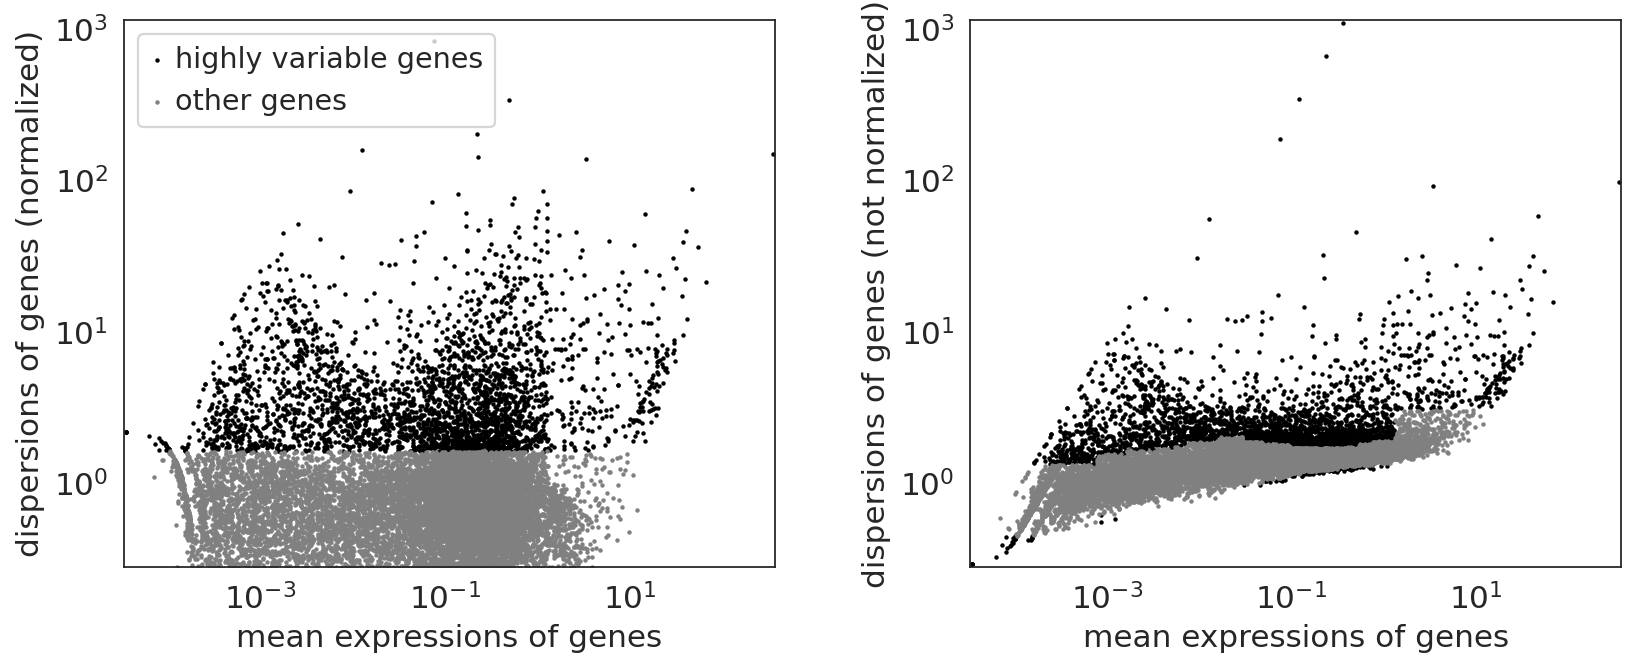

Keeping provided genes if available...
(8366, 3019)
[6] Normalizing per cell again using total_counts
normalizing by total count per cell
    finished (0:00:03): normalized adata.X and added    'total_counts', counts per cell before normalization (adata.obs)
[7] Log1p transformation
[8] Scaling
### PIPE [2] EMBEDDING DATA


  0%|          | 0/8 [00:00<?, ?it/s]

[1] Computing PCA
computing PCA
    with n_comps=50
    finished (0:00:05)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)


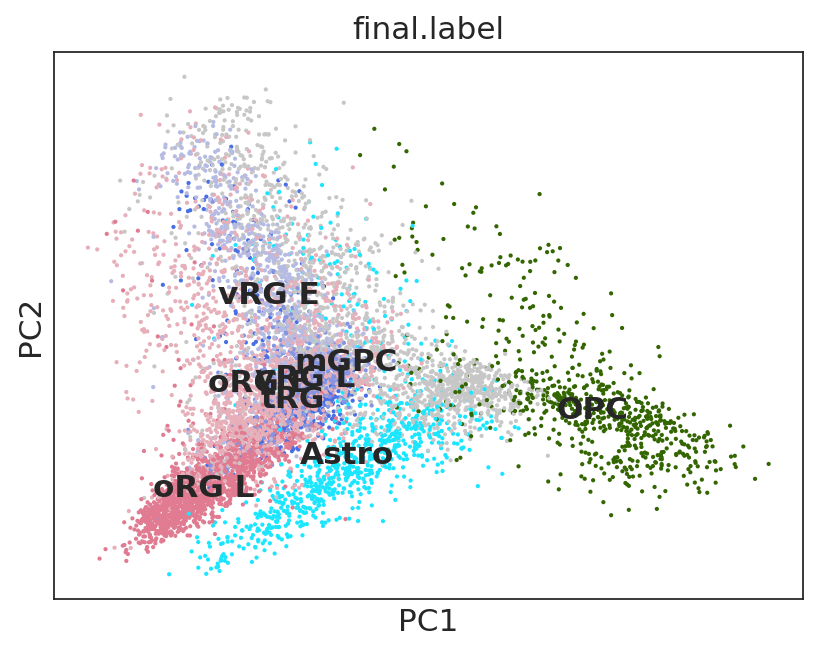

[2] Computing neighbors
computing neighbors
    computing neighbors
    computed neighbors (0:01:47)
    computed connectivities (0:00:08)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:55)
[3] Computing diffusion map
computing Diffusion Maps using n_comps=20(=n_dcs)
        initialized `.distances` `.connectivities` 
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9959282  0.9916227  0.9878646  0.98628104 0.9805136
     0.9767612  0.9739794  0.96649617 0.9645897  0.9617152  0.96052426
     0.95907205 0.9562733  0.95322436 0.94920254 0.9437511  0.94154096
     0.9396307  0.9384494 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
[4] Computing neighbors in diffusion map
computing neighbors
        initialized `.distanc

  0%|          | 0/500 [00:00<?, ?it/s]

    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:41)


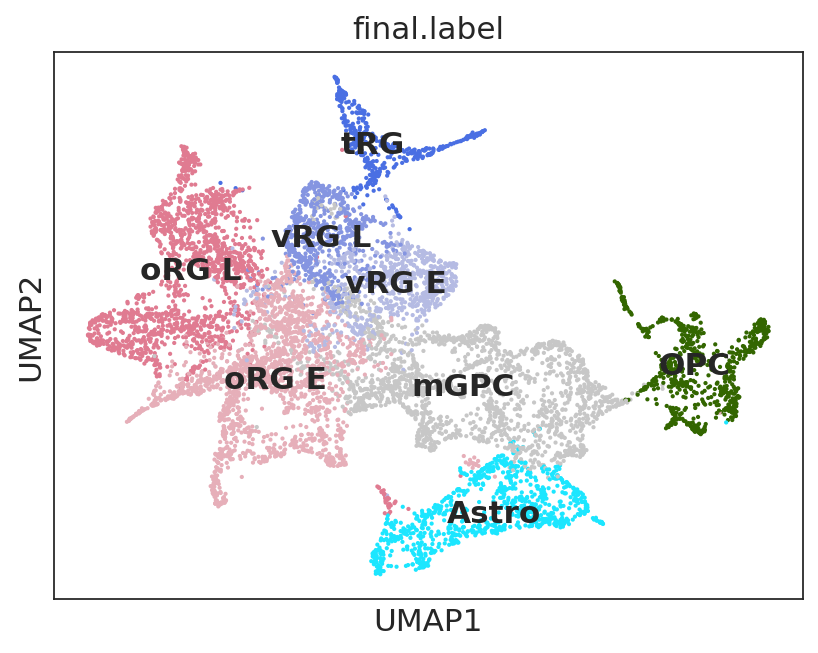

[6] Constructing PAGA graph (1/2)
running PAGA
        initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])


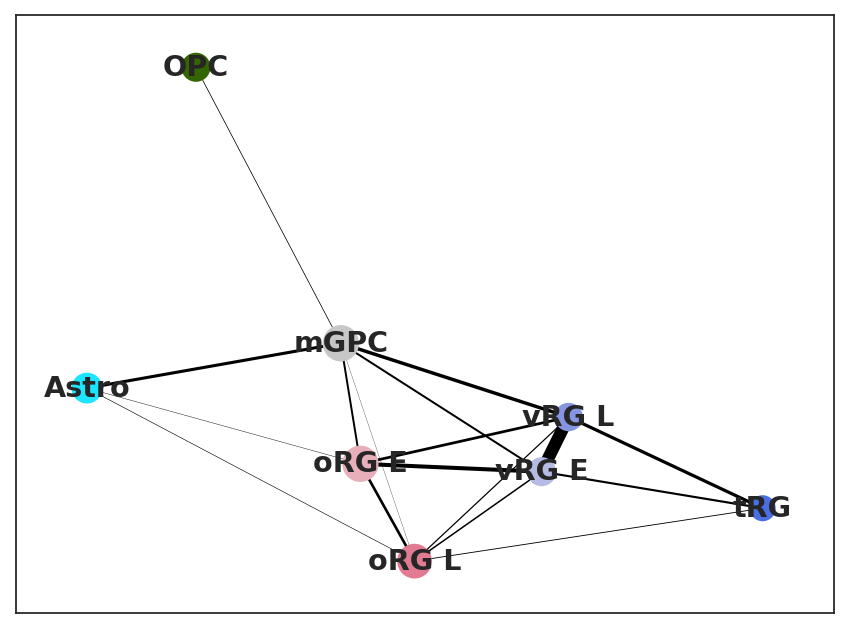

[7] Constructing PAGA graph (2/2)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:02:12)


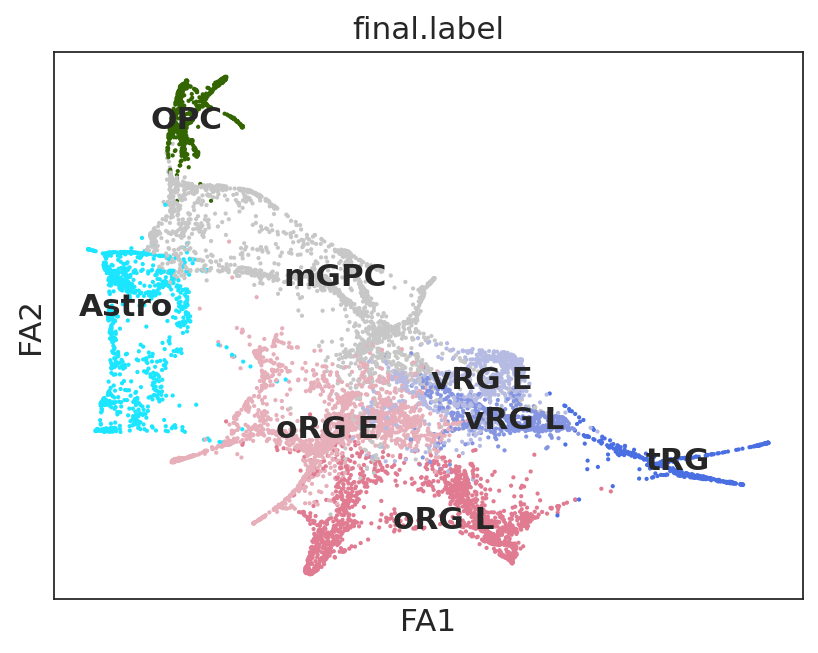

[8] Constructing PHATE graph
X_scvi
Running on X_scvi obsm
Calculating PHATE...
  Running PHATE on 8366 observations and 10 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.95 seconds.
    Calculating affinities...
    Calculated affinities in 1.39 seconds.
  Calculated graph and diffusion operator in 5.64 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 11.71 seconds.
    Calculating KMeans...
    Calculated KMeans in 10.95 seconds.
  Calculated landmark operator in 27.27 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.49 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 15.42 seconds.
Calculated PHATE in 48.85 seconds.


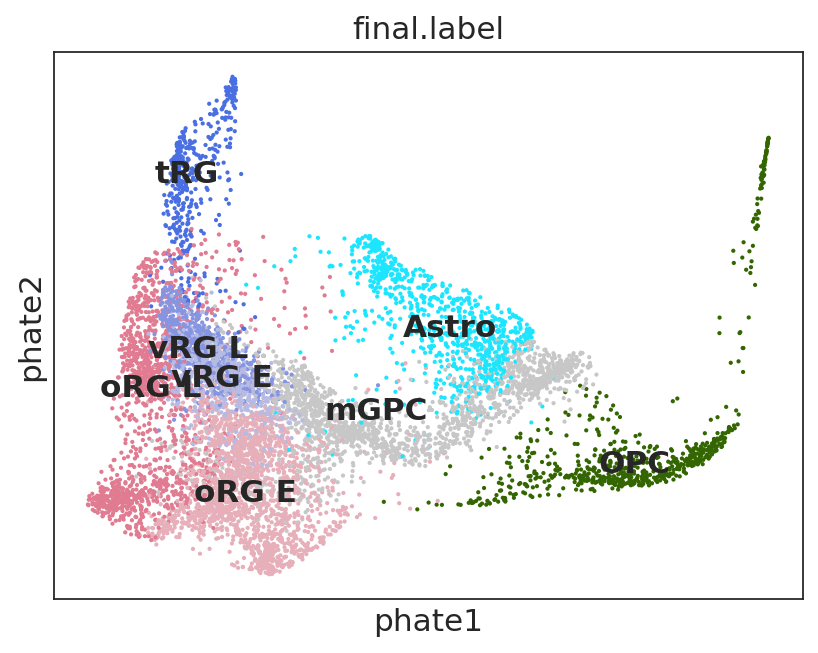

### PIPE [3] COMPUTING PSEUDOTIME


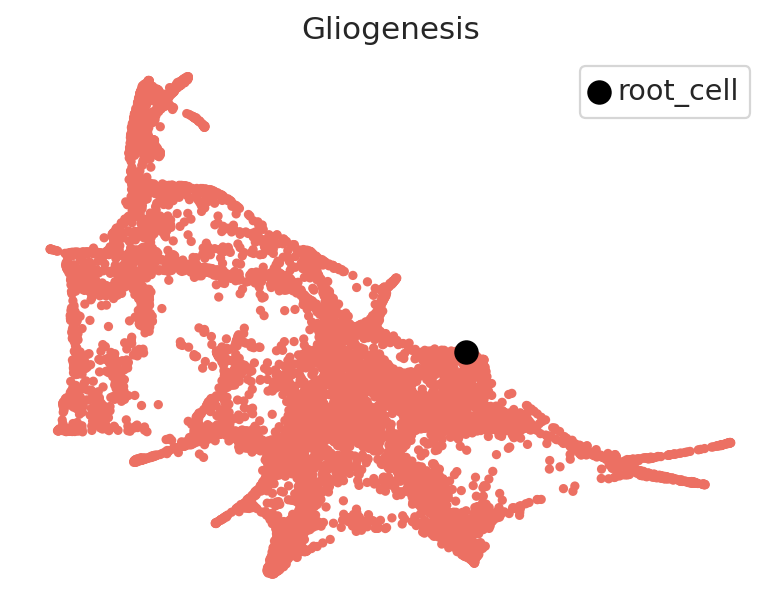

        initialized `.distances` `.connectivities` `.eigen_values` `.eigen_basis` `.distances_dpt`
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


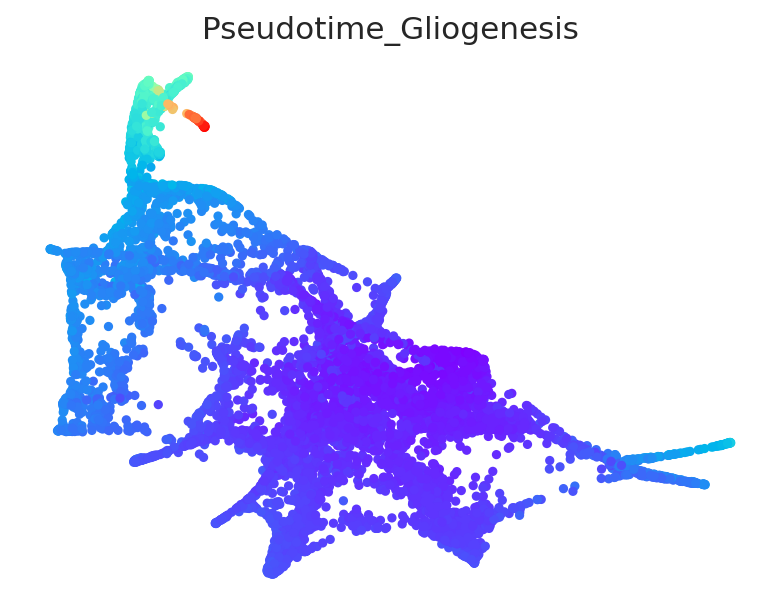

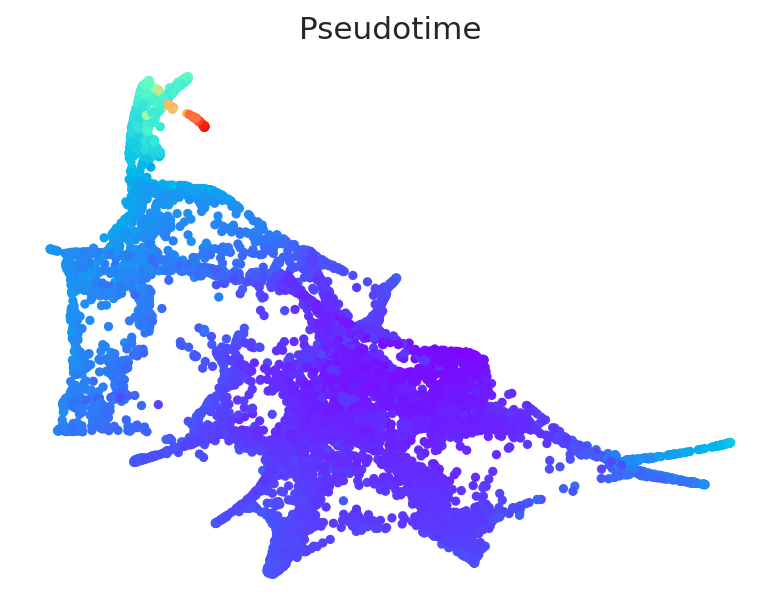

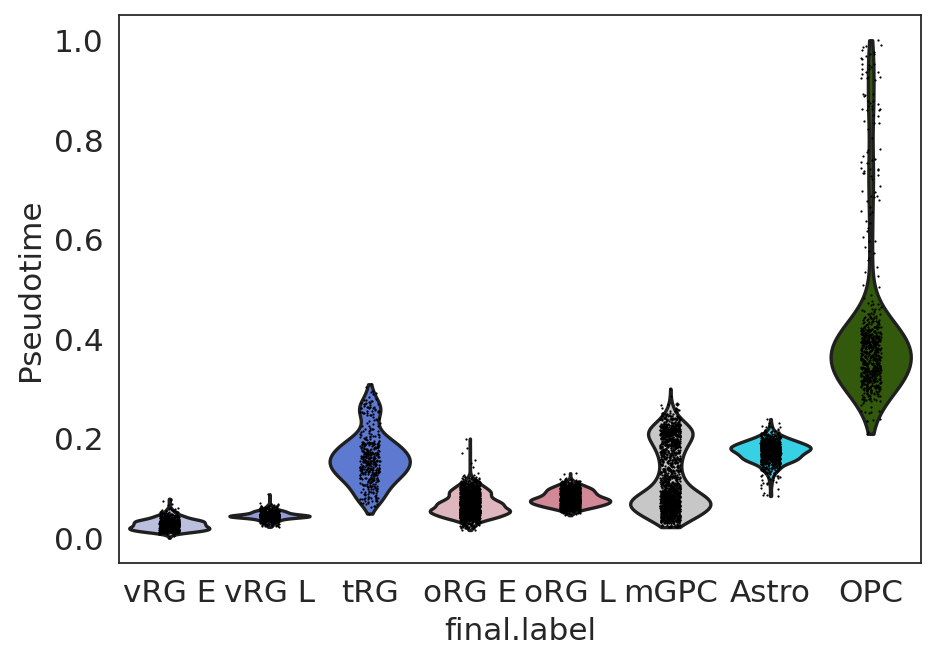

### PIPE [4] SAVING DATA


In [16]:
adata = prepare_rna.prepare_adata(
    
    adata_complete,
    group_by='final.label',
    save_dir=new_dir,
    # save_dir=None,

    
    min_total_counts_per_cell=1,
    key_n_counts='total_counts',
    n_top_genes=3000,
    genes_to_keep=genes_to_keep,

    nn_1_n_neighbors=10,
    nn_1_use_rep='X_scvi',
    nn_1_n_pcs=10,
    dm_n_comps=20,
    nn_2_n_neighbors=50,

    phate_run_on='X_scvi',
    phate_t=5,
    phate_knn=60,
    phate_decay=10,
    phate_n_pca=None,
    
    skip_paga=False,
    skip_umap=False,
    skip_phate=False,
    random_state=None,    

    root_cells='hft_w16_p7_r2_TGGAGAGAGAGGACTC',
    lineages=None, 
    lineage_name=subset,
    embedding_key='X_draw_graph_fa',
    verbose=True)

In [17]:
## I do not remember right now why I copied these embeddings from the original CellOracle data to this subanalysis
# So as soon as I remember it I should write it down here
# Let's not run it 

# **Part 3 //** Fit GRN to expression

In [18]:
import network_fit

In [19]:
sorted(os.listdir(new_dir))

['RNA.processed.h5ad']

In [20]:
oracle, links = network_fit.network_fit_pipe(
    adata_fname = os.path.join( new_dir, 'RNA.processed.h5ad'),
    base_GRN_fname = 'base_grn.coaccessibility=0.8.score=8.base_grn.parquet',
    cluster_column_name = 'final.label',
    max_n_pcs = 50,
    links_alpha=10,
    links_pval=0.001,
    links_top_n_coef=2000,
    # seed = 4,
    verbose = True,
    save_dir=new_dir,
    test_mode=False)

  0%|          | 0/7 [00:00<?, ?it/s]

[1] Reading data
Loading adata
Loading GRN
[2] Prepairing oracle object


  0%|          | 0/4 [00:00<?, ?it/s]

[1] Instatiating Oracle with raw RNA-Seq data
    Expression range:                   0
count   8366.000000
mean    3915.346436
std     2252.710693
min      256.000000
25%     2443.000000
50%     3507.500000
75%     5075.750000
max    30881.000000
[2] Adding GRN data to Oracle
[3] Computing and selecting PCs and k for neighbors
[4] Computing KNNs:
    n cells: 8366
    k: 209
    oracle.knn_imputation(n_pca_dims=n_comps, k=209, balanced=True, b_sight=1672, b_maxl=836, n_jobs=-1)
Oracle object

Meta data
    celloracle version used for instantiation: 0.12.0
    n_cells: 8366
    n_genes: 3019
    cluster_name: final.label
    dimensional_reduction_name: X_draw_graph_fa
    n_target_genes_in_TFdict: 20004 genes
    n_regulatory_in_TFdict: 1098 genes
    n_regulatory_in_both_TFdict_and_scRNA-seq: 176 genes
    n_target_genes_both_TFdict_and_scRNA-seq: 2673 genes
    k_for_knn_imputation: 209
Status
    Gene expression matrix: Ready
    BaseGRN: Ready
    PCA calculation: Done
    Knn impu

  0%|          | 0/8 [00:00<?, ?it/s]

Inferring GRN for Astro...


  0%|          | 0/2673 [00:00<?, ?it/s]

Inferring GRN for OPC...


  0%|          | 0/2673 [00:00<?, ?it/s]

Inferring GRN for mGPC...


  0%|          | 0/2673 [00:00<?, ?it/s]

Inferring GRN for oRG E...


  0%|          | 0/2673 [00:00<?, ?it/s]

Inferring GRN for oRG L...


  0%|          | 0/2673 [00:00<?, ?it/s]

Inferring GRN for tRG...


  0%|          | 0/2673 [00:00<?, ?it/s]

Inferring GRN for vRG E...


  0%|          | 0/2673 [00:00<?, ?it/s]

Inferring GRN for vRG L...


  0%|          | 0/2673 [00:00<?, ?it/s]

[4] Checking links
All fits are valid.
[5] Postprocessing links
[6] Scoring genes


  0%|          | 0/8 [00:00<?, ?it/s]

/scratch/xoel/tmp/64/2/scratch/xoel/tmp/64/35/scratch/xoel/tmp/64/36

/scratch/xoel/tmp/64/50/scratch/xoel/tmp/64/94

/scratch/xoel/tmp/64/47
/scratch/xoel/tmp/64/46/scratch/xoel/tmp/64/26


/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R
/users/genomics/xoel/venvs/cicero/bin/R



Attaching package: ‘igraph’


Attaching package: ‘igraph’


Attaching package: ‘igraph’



Attaching package: ‘igraph’
Attaching package: ‘igraph’




Attaching package: ‘igraph’
The following objects are masked from ‘package:stats’:
The following objects are masked from ‘package:stats’:
The following objects are masked from ‘package:stats’:
The following objects are masked from ‘package:stats’:
Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:





The following objects are masked from ‘package:stats’:
    decompose, spectrum

    decompose, spectrum
    decompose, spectrum
    decompose, spectrum

The following objects are masked from ‘package:stats’:


    decompose, spectrum



The following object is masked from ‘package:base’:
The following object is masked from ‘package:base’:
The following object is masked from ‘package:base’:
    decompose, spectrum
    decompose, spectrum
The following object is masked from ‘package:base’:





The following

[7] Saving results
- Saving raw links per cluster


  0%|          | 0/8 [00:00<?, ?it/s]

- Saving filtered links per cluster


  0%|          | 0/8 [00:00<?, ?it/s]

- Saving processed links
- Saving oracle


In [22]:
%matplotlib Agg
network_fit.pipe_plots(links, save_dir=new_dir)

  0%|          | 0/5 [00:00<?, ?it/s]

Astro
OPC
mGPC
oRG E
oRG L
tRG
vRG E
vRG L


  0%|          | 0/8 [00:00<?, ?it/s]

degree_centrality_all
eigenvector_centrality


  0%|          | 0/3 [00:00<?, ?it/s]

Genes in filtered network: 809


  0%|          | 0/809 [00:00<?, ?it/s]

ABCC9
ACAP3
ACAT2
ACSBG1
ACTB
ACTG1
ACTR3B
ADD3
ADGRV1
AGT
AHCYL1
AHRR
ALDOC
AMOTL2
ANKRD9
ANXA1
ANXA2
APCDD1
APLP1
APOD
APOE
AQP4
ARC
ARHGAP11A
ARID5B
ARL4A
ARL4C
ARL6IP1
ASCL1
ASF1B
ASPM
ASRGL1
ATAD2
ATCAY
ATF3
ATP1A2
ATP1B2
ATP1B3
AURKA
AURKB
B2M
B3GAT2
BAALC
BACH2
BARD1
BASP1
BATF3
BCAN
BCAS1
BCHE
BCL11A
BCL11B
BCL3
BHLHE41
BIRC5
BNIP3
BRCA1
BRCA2
BRIP1
BTBD17
BTG1
BTG2
BUB1
BUB1B
BUB3
C11orf96
C12orf75
C1QL1
C1QL2
C21orf58
C2orf69
C3orf70
C8orf76
C9orf24
CA12
CA3
CADM2
CALM1
CALM2
CAMSAP2
CARHSP1
CASP3
CCDC146
CCDC170
CCDC34
CCDC80
CCL2
CCN1
CCN2
CCNA1
CCNA2
CCNB1
CCNB2
CCND1
CCND2
CCNE2
CCNF
CCNL1
CCNT2
CD38
CD9
CDC20
CDC25B
CDCA2
CDCA3
CDCA4
CDCA5
CDCA7
CDCA8
CDK1
CDK6
CDKN1C
CDKN2C
CDKN2D
CDKN3
CDO1
CDT1
CEBPB
CEBPD
CENPA
CENPB
CENPE
CENPF
CENPH
CENPJ
CENPK
CENPM
CENPN
CENPU
CENPW
CEP126
CEP135
CEP55
CEP70
CFAP126
CHAF1A
CHEK1
CHST11
CKAP2
CKAP2L
CKAP5
CKB
CKS2
CLDN10
CLSPN
CLU
CNIH2
CNN3
CNP
CNTLN
COL11A1
COL20A1
COLGALT2
CPE
CRB1
CRH
CROT
CRYAB
CRYM
CSPG5
CSRP2
CST3
CTNNA2
CT

  0%|          | 0/809 [00:00<?, ?it/s]

()

# **Part 4 //** Perturbation analysis

In [11]:
import perturbations
%matplotlib inline

In [12]:
sorted(os.listdir(new_dir))

['Gradient.Perturbation.celloracle.gradient',
 'Links.Perturbation.celloracle.links',
 'Links.celloracle.links',
 'Oracle.Perturbation.celloracle.oracle',
 'Oracle.celloracle.oracle',
 'RNA.processed.h5ad',
 'cluster_GRN',
 'network_plots',
 'pert_KO',
 'pert_KO_full',
 'pert_OE',
 'pert_OE_full']

### Simulation

In [13]:
oracle = perturbations.co.load_hdf5(os.path.join(new_dir, 'Oracle.Perturbation.celloracle.oracle'))
gradient = perturbations.co.load_hdf5(os.path.join(new_dir, 'Gradient.Perturbation.celloracle.gradient'))

In [14]:
%matplotlib Agg

### Full Simulation

In [15]:
if os.path.exists(os.path.join(new_dir, 'pert_KO_full/perturbation_transitions/')):
    genes_done_ko_full = ['_'.join(s.split('KO.')[1].split('_')[:-1]) for s in os.listdir(os.path.join(new_dir, 'pert_KO_full/perturbation_transitions/')) if 'KO' in s]
else:
    genes_done_ko_full = []
genes_undone_ko_full = [g for g in oracle.active_regulatory_genes if g not in genes_done_ko_full]

In [16]:
genes_undone_ko_full

[]

In [15]:
ps_sums = perturbations.run_systemic_simulation_async(
    oracle, gradient, groups=groups, 
    genes=genes_undone_ko_full,
    n_cores=n_cores, n_parallel_genes=1, overwrite=True,
    p_mass_smooth = 0.8,
    p_mass_n_grid = 40,
    p_mass_n_neighbors = 200,
    p_mass_filter_min = 0.0017,
    save_dir=os.path.join(new_dir, 'pert_KO_full')
)

Excluding: []
Selected number of neighbors: 200


  0%|          | 0/174 [00:00<?, ?it/s]

perturbation_hdf5/KO.AHRR.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AHRR.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AHRR.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AHRR.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AHRR.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AHRR.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AHRR.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.AIRE.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AIRE.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AIRE.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AIRE.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AIRE.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AIRE.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.AIRE.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ARID5B.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ARID5B.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ARID5B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ARID5B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ARID5B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ARID5B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ARID5B.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ASCL1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ASCL1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ASCL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ASCL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ASCL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ASCL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ASCL1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ATF3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ATF3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.BACH2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BACH2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BACH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BACH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BACH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BACH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BACH2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.BATF3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BATF3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BATF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BATF3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.BCL11A.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11A.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11A.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.BCL11B.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11B.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL11B.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.BCL3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BCL3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.BHLHE22.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE22.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE22.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE22.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE22.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE22.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE22.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.BHLHE41.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE41.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE41.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE41.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE41.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE41.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BHLHE41.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.BRCA1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BRCA1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BRCA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BRCA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BRCA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BRCA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.BRCA1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.CCNT2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CCNT2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CCNT2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CCNT2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CCNT2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CCNT2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CCNT2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.CEBPB.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPB.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPB.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.CEBPD.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPD.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPD.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPD.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPD.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPD.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CEBPD.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.CENPB.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CENPB.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CENPB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CENPB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CENPB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CENPB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.CENPB.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.DBX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DBX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.DDIT3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DDIT3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DDIT3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DDIT3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DDIT3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DDIT3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DDIT3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.DLX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.DLX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.DLX5.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX5.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DLX5.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.DMRTA1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DMRTA1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DMRTA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DMRTA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DMRTA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DMRTA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.DMRTA1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.E2F1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.E2F8.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F8.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F8.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F8.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F8.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F8.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.E2F8.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.EBF1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EBF1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EBF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EBF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EBF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EBF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EBF1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.EGR1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.EGR2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.EGR3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EGR3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ELF3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELF3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELF3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELF3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ELK3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELK3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELK3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELK3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELK3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELK3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ELK3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.EMX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EMX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EMX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EMX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EMX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EMX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EMX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.EOMES.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EOMES.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EOMES.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EOMES.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EOMES.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EOMES.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EOMES.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.EPAS1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EPAS1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EPAS1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ESRRB.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ESRRB.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ESRRB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ESRRB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ESRRB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ESRRB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ESRRB.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ETS1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ETS2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETS2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ETV1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ETV5.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV5.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ETV5.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.EZH2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EZH2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EZH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EZH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EZH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EZH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.EZH2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FEZF1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FEZF2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FEZF2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOS.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOS.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOS.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOS.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOS.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOS.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOS.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOSB.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOSB.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOSB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOSB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOSB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOSB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOSB.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOXB1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXB1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXB1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOXD4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXD4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXD4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXD4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXD4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXD4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXD4.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOXF1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXF1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXF1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOXG1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXG1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXG1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOXJ1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXJ1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXJ1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXJ1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXJ1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXJ1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXJ1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOXM1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXM1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXM1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXM1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXM1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXM1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXM1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.FOXP1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXP1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.FOXP1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.GATA1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GATA1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GATA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GATA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GATA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GATA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GATA1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.GBX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GBX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GBX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.GFI1B.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GFI1B.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GFI1B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GFI1B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GFI1B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GFI1B.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GFI1B.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.GRHL1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GRHL1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GRHL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GRHL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GRHL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GRHL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GRHL1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.GSX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.GSX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.GSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HERPUD1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HERPUD1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HERPUD1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HERPUD1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HERPUD1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HERPUD1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HERPUD1.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HES1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HES4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HES5.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES5.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HES5.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HEY1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HEY1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HEY1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HEY1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HEY1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HEY1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HEY1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HIVEP2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HIVEP3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HIVEP3.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HMGA1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMGA1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMGA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMGA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMGA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMGA1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMGA1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HMX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HMX1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HNF4A.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HNF4A.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HNF4A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HNF4A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HNF4A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HNF4A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HNF4A.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HOXB7.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HOXB7.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HOXB7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HOXB7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HOXB7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HOXB7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HOXB7.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.HSF4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HSF4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HSF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HSF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HSF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HSF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.HSF4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ID1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ID2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ID3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ID4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ID4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.INSM1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.INSM1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.INSM1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.INSM1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.INSM1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.INSM1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.INSM1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.IRF1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRF1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRF1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRF1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.IRX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.IRX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.IRX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.IRX3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ISL2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ISL2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ISL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ISL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ISL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ISL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ISL2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.JDP2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JDP2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.JUN.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUN.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.JUNB.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUNB.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUNB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUNB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUNB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUNB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUNB.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.JUND.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUND.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUND.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUND.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUND.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUND.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.JUND.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.KLF10.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF10.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF10.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF10.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF10.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF10.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF10.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.KLF2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.KLF4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.KLF6.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF6.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF6.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.KLF7.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF7.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.KLF7.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.LHX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.LHX4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LHX4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.LMO2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LMO2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LMO2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LMO2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LMO2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LMO2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.LMO2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MAF.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAF.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MAFB.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFB.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFB.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MAFF.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFF.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFF.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MAFF.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MECOM.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MECOM.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MECOM.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MECOM.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MECOM.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MECOM.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MECOM.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MEF2C.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEF2C.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEF2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEF2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEF2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEF2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEF2C.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MEIS2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MSX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MYBL1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MYBL2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MYC.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MYCN.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NEUROD2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NEUROD6.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NEUROG1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NEUROG2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NFATC2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NFE2L1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NFIL3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NHLH2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NKX2-1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NKX2-2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NKX6-2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NPAS1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR2F1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR2F2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR3C1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR4A1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR4A2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR4A3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR6A1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.OLIG1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.OLIG2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ONECUT1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.OSR1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PAX6.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PBX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PITX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PITX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PLAGL1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.POU2F2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.POU3F1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.POU3F2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PROX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_KO_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PRRX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [17]:
if os.path.exists(os.path.join(new_dir, 'pert_OE_full/perturbation_transitions/')):

    genes_done_oe_full = ['_'.join(s.split('KO.')[1].split('_')[:-1]) for s in os.listdir(os.path.join(new_dir, 'pert_OE_full/perturbation_transitions/')) if '.csv' in s]
else:
    genes_done_oe_full = []
genes_undone_oe_full = [g for g in oracle.active_regulatory_genes if g not in genes_done_oe_full]

In [18]:
if genes_undone_oe_full:
    ps_sums = perturbations.run_systemic_simulation_async(
        oracle, gradient, groups=groups, 
        genes=genes_undone_oe_full,
        exp_fct=2,
        n_cores=n_cores, n_parallel_genes=1, overwrite=True,
        p_mass_smooth = 0.8,
        p_mass_n_grid = 40,
        p_mass_n_neighbors = 200,
        p_mass_filter_min = 0.0017,
        save_dir=os.path.join(new_dir, 'pert_OE_full')
    )

Excluding: []
Selected number of neighbors: 200


  0%|          | 0/78 [00:00<?, ?it/s]

perturbation_hdf5/KO.MEIS2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MEIS2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MSX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MSX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MYBL1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MYBL2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYBL2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MYC.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYC.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.MYCN.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.MYCN.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NEUROD2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD2.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NEUROD6.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROD6.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NEUROG1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG1.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NEUROG2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NEUROG2.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NFATC2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFATC2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NFE2L1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFE2L1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NFIL3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NFIL3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NHLH2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NHLH2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NKX2-1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NKX2-2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX2-2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NKX6-2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NKX6-2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NPAS1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NPAS1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR2F1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR2F2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR2F2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR3C1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR3C1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR4A1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR4A2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR4A3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR4A3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.NR6A1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.NR6A1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.OLIG1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.OLIG2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OLIG2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ONECUT1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ONECUT1.celloracle.hdf5
Dumping to /users/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.OSR1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.OSR1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PAX6.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PAX6.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PBX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PBX3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PITX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PITX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PITX3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PLAGL1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PLAGL1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.POU2F2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU2F2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.POU3F1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F1.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.POU3F2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.POU3F2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PROX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PROX1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.PRRX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PRRX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PRRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PRRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PRRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PRRX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.PRRX1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RAX.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RAX.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RAX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RAX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RAX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RAX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RAX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RFX4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RFX7.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX7.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX7.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RFX7.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RORB.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RORB.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RORB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RORB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RORB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RORB.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RORB.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.RUNX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RUNX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RUNX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RUNX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RUNX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RUNX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.RUNX3.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SALL4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SALL4.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SIM2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIM2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIM2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIM2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIM2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIM2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIM2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SIN3A.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIN3A.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIN3A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIN3A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIN3A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIN3A.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIN3A.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SIX5.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SIX5.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX10.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX10.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX10.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX10.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX10.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX10.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX10.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX11.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX11.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX17.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX17.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX17.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX17.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX17.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX17.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX17.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX3.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX3.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX4.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX4.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX8.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX8.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX8.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX8.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX8.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX8.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX8.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SOX9.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SOX9.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SP5.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP5.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP5.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.SP9.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP9.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.SP9.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TAL2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TAL2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TBR1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TBR1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TCF12.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF12.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF12.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF12.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF12.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF12.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF12.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TCF7L2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF7L2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF7L2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF7L2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF7L2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF7L2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TCF7L2.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TFAP2C.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFAP2C.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TFDP1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP1.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TFDP2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TFDP2.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.TLX2.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TLX2.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.TLX2.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.VENTX.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.VENTX.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.VENTX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.VENTX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.VENTX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.VENTX.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.VENTX.celloracle.hdf5
Dumping to /users/genomics/xoe

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.YBX1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.YBX1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZBTB18.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZBTB18.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZEB1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZEB1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZIC1.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZIC1.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZIC1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZIC1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZIC1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZIC1.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZIC1.celloracle.hdf5
Dumping to /users/genomics/xoel/code

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF143.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF143.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF143.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF143.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF143.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF143.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF143.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF274.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF274.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF274.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF274.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF274.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF274.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF274.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF320.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF320.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF320.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF320.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF320.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF320.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF320.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF331.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF331.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF436.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF436.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF436.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF436.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF436.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF436.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF436.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF467.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF467.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF467.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF467.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF467.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF467.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF467.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

perturbation_hdf5/KO.ZNF713.celloracle.hdf5


  0%|          | 0/5 [00:00<?, ?it/s]

Calculating expression shift
Estimating transition probabilities
Calculating embedding shift
Calculating p_mass
Running Markov chain simulation
File path: /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
No hdf file found in the path. New hdf5 file was created.
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomics/xoel/codebases/co_new/data_foxg1/Gliogenesis/pert_OE_full/perturbation_hdf5/KO.ZNF713.celloracle.hdf5
Dumping to /users/genomi

  0%|          | 0/5 [00:00<?, ?it/s]

Getting PS for all groups


In [19]:
print('')